# Pupils

ost any physical optics model begins with a description of a wave at a pupil plane. This page will cover the core functionality of pupils; each analytical variety has its own documentation.

All Pupil parameters have default values, so one may be created with no arguments,

In [1]:
%matplotlib inline
from prysm import Pupil
p = Pupil()

Pupils will be modeled using square arrays, the shape of which is controlled by a `samples` argument. They also accept a `dia` argument which controls their diameter in mm, as well as `wavelength` which sets the wavelength of light used in microns. There is also an `opd_unit` argument that tells prysm what units are used to describe the phase associated with the pupil. Finally, a `mask` may be specified, either as a string using prysm’s built-in masking capabilities, or as an array of the same shape as the pupil. Putting it all together,

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b3849d25c8>)

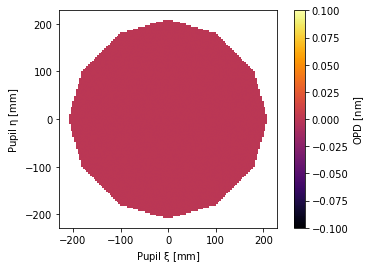

In [2]:
p = Pupil(samples=123, dia=456.7, wavelength=1.0, z_unit='nm', phase_mask='dodecagon')
p.plot2d()

`p` is a pupil with a 12-sided aperture backed by a 123x123 array which spans 456.7 mm and is impinged on by light of wavelength 1 micron.

Pupils have some more advanced parameters. `mask_target` determines if the phase (`p.phase`), wavefunction (`p.fcn`), or both (`both`) will be masked. When embedding prysm in a task that repeatedly creates pupils, e.g. an optimizer for wavefront sensing, applying the mask to the phase is wasted computation and can be avoided.

If you wish to provide your own data for a pupil model, simply provide the ux, uy, and phase arguments, which are the x and y unit axes of shape (n,) and (m,), and phase is in units of opd_unit and of shape (m,n).

In [3]:
import numpy as np
x, y, phase = np.linspace(-1,1,128), np.linspace(-1,1,128), np.random.rand(128,128)
p = Pupil(x=x, y=y, phase=phase, z_unit='um')

# below examples will want something nicer...
p = Pupil()

The wavefront quality can be evaluated by classical metrics:

In [4]:
p.pv, p.rms, # in units of opd_unit

(0.0, 0.0)

or Strehl ratio under the approximation given in [Welford],

In [5]:
p.strehl  # ∈ [0,1]

1.0

The pupil may also be plotted. Plotting functions have defaults for all arguments, but may be overriden

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b384e38bc8>)

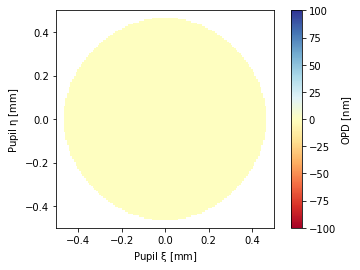

In [6]:
p.plot2d(cmap='RdYlBu', clim=100, interpolation='sinc')

`cmap` and `interpolation` are passed directly to matplotlib. `clim` is made symmetric if only a single value is given.  A figure and axis may also be provided if you would like to control these, for e.g. making a figure with multiple axes for different stages of the model

(<Figure size 432x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b384ef4908>)

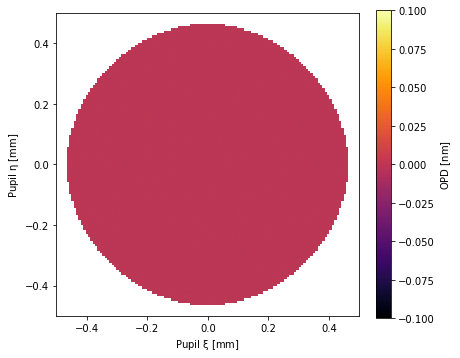

In [7]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
p.plot2d(fig=fig, ax=ax)

A synthetic interferogram may be generated,

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b384fb5e48>)

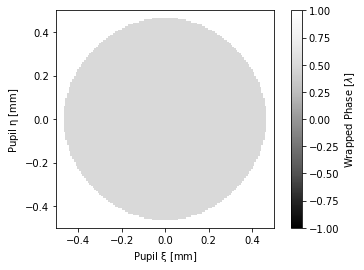

In [8]:
# this one is empty because there is no phase error.
p.interferogram(passes=2, visibility=0.5)

Pupils also support addition and subtraction with other pupil objects,

In [9]:
p2 = p + p - p